In [101]:
# Libraries: Numpy, Pandas, Matplotlib, Keras, Sklearn.

import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

from keras.regularizers import l1


Train on 30000 samples, validate on 10000 samples
Epoch 1/25
30000/30000 [==============================] - 5s 153us/step - loss: 254.5367 - val_loss: 102.0287
Epoch 2/25
30000/30000 [==============================] - 3s 114us/step - loss: 55.8451 - val_loss: 20.9267
Epoch 3/25
30000/30000 [==============================] - 3s 115us/step - loss: 6.3802 - val_loss: 1.8811
Epoch 4/25
30000/30000 [==============================] - 4s 127us/step - loss: 1.3486 - val_loss: 0.7189
Epoch 5/25
30000/30000 [==============================] - 3s 115us/step - loss: 1.1665 - val_loss: 0.7724
Epoch 6/25
30000/30000 [==============================] - 3s 116us/step - loss: 0.9522 - val_loss: 0.2390
Epoch 7/25
30000/30000 [==============================] - 4s 121us/step - loss: 1.0037 - val_loss: 0.1942
Epoch 8/25
30000/30000 [==============================] - 4s 124us/step - loss: 0.6446 - val_loss: 0.1682
Epoch 9/25
30000/30000 [==============================] - 3s 116us/step - loss: 0.9997 - val_los

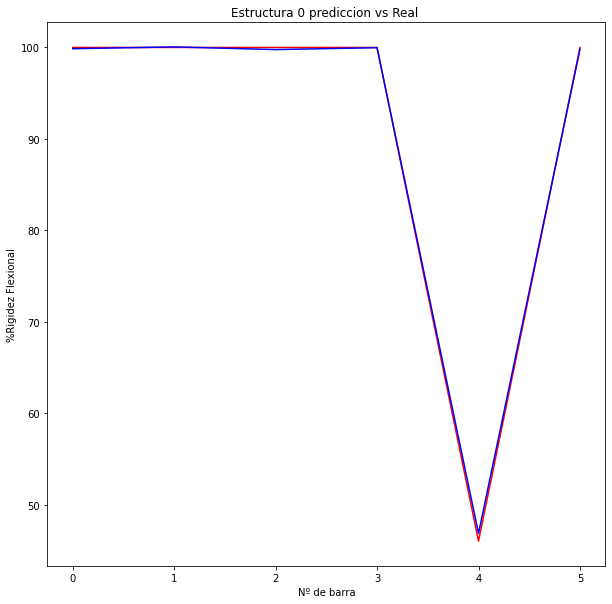

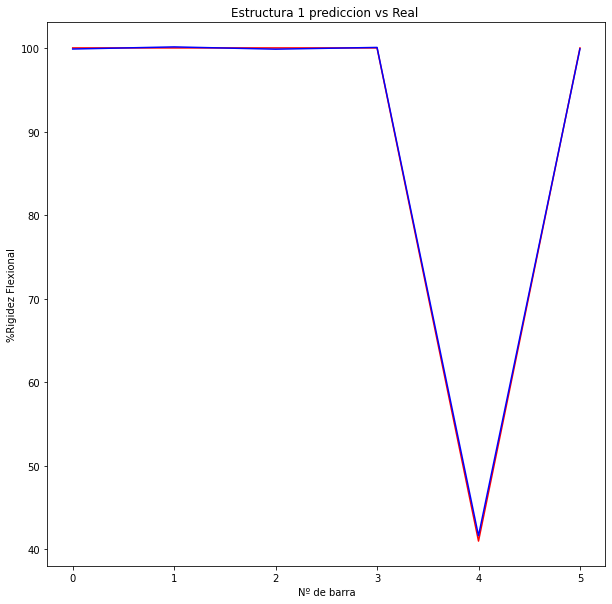

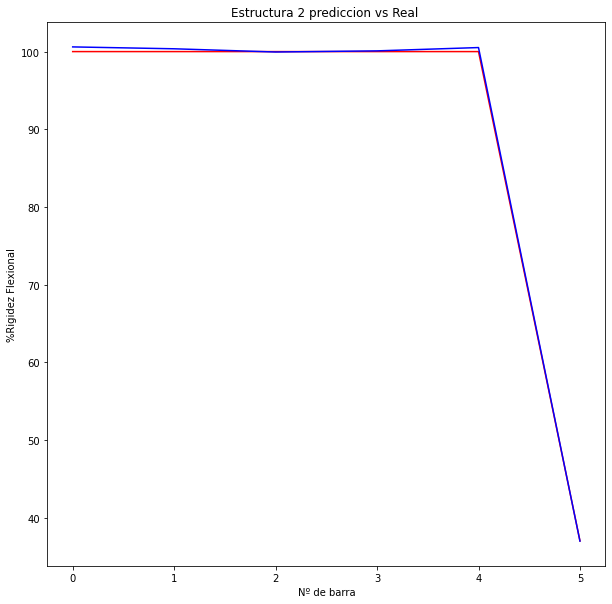

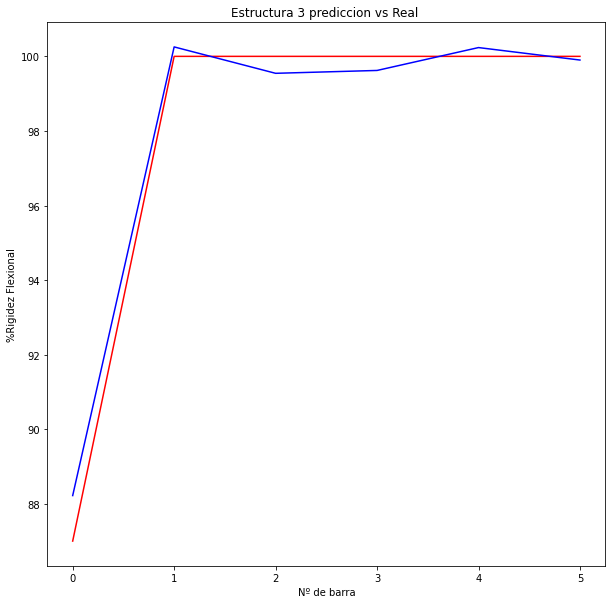

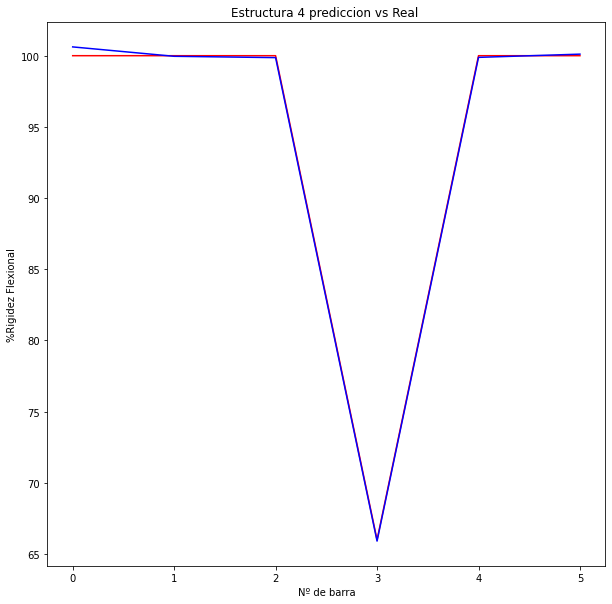

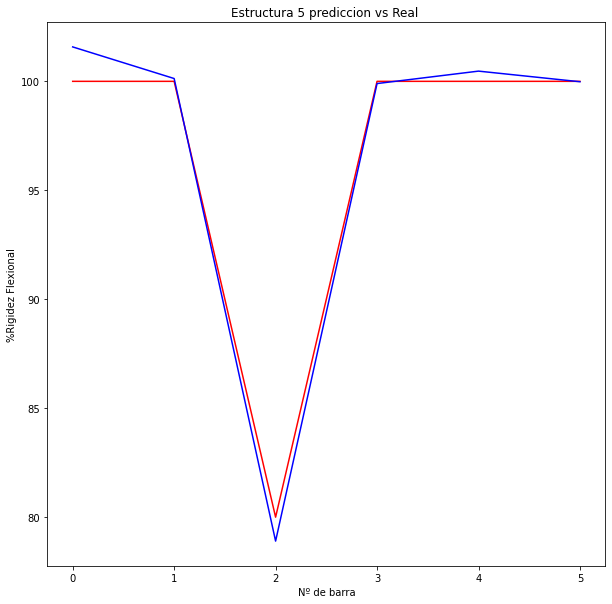

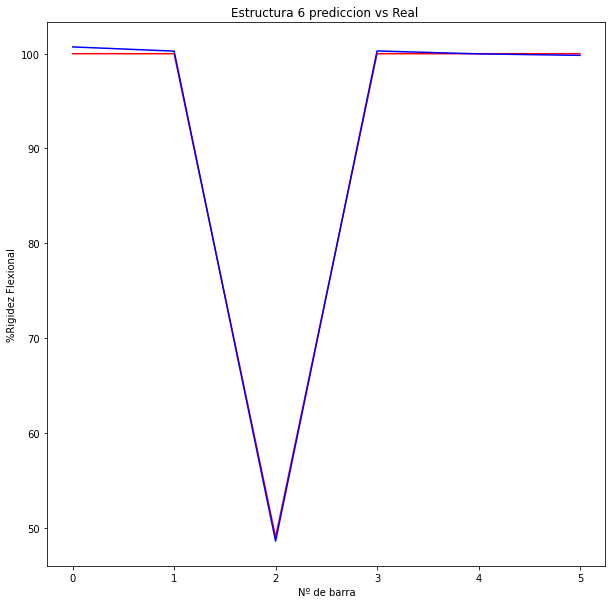

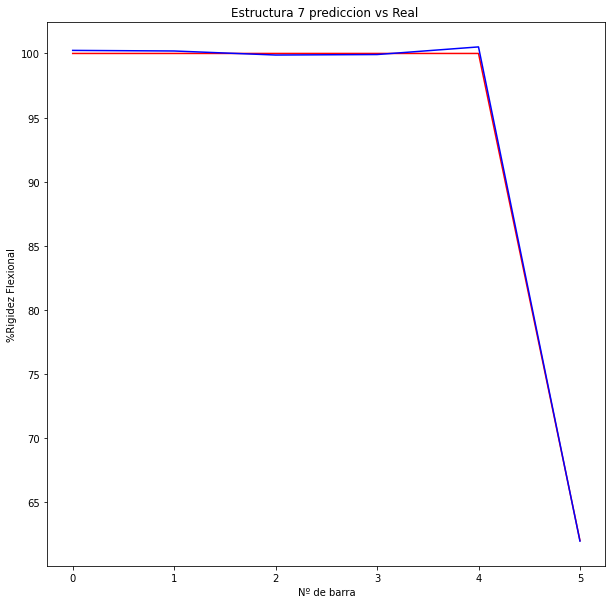

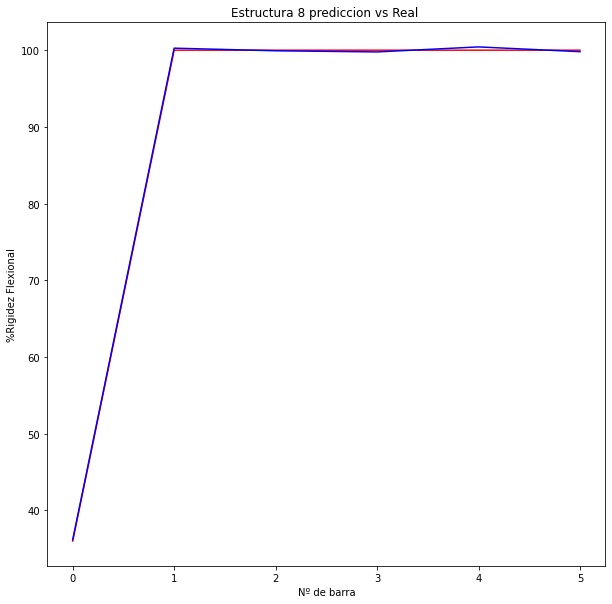

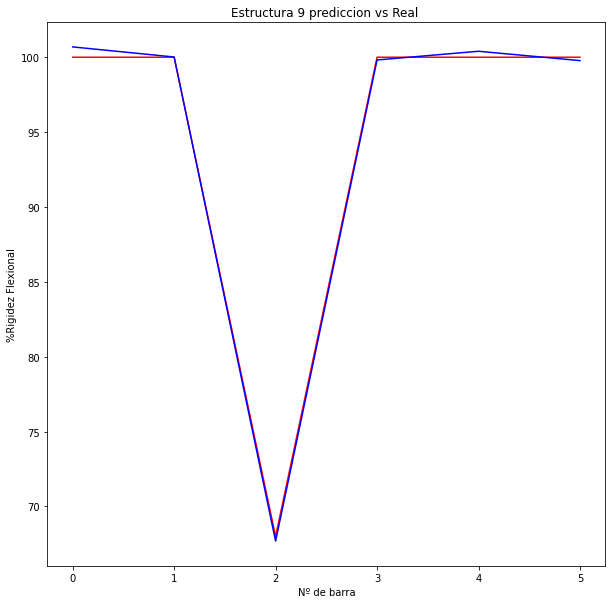

In [109]:
# NEURAL NETWORK ALGORITHM
# <Completar con los parametros:
csv_dataset = "input_pasarela5.csv"
n_train_events = 30000
capa_input = 5
funcion_activacion = "relu"
capas_ocultas = 80
capa_output = 6
n_epochs = 25
csv_test = "test1.csv"

# Genero una clase para que el entrenamiento de la red termine cuando Accuracy = 90%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.10):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
# 1) LECTURA DEL CONJUNTO DE DATOS

df = pd.read_csv(csv_dataset,parse_dates=[0],   header=None,index_col=0,squeeze=True, names=['nº', 'M0DO 1','MODO 2', 'MODO 3', 'MODO 4', 'MODO 5', 'DESPL 1', 'DESPL 2',  'DESPL 3',  'DESPL 4',  'DESPL 5', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', "I1", "I2", "I3", "I4", "I5", "I6"])

# 2) MANIPULACION DEL CONJUNTO DE DATOS

# Separacion entre datos de entramiento de red (train) y datos de testeo de la red (test) --> filas
values = df.values #agrupacion del conjunto de datos en un vector o array
train, test = train_test_split(values)
#train = values[:n_train_events, :] #definicion del intervalo que indica los valores usados para train [fila0:fila_final, columna0:columna_final]
#test = values[n_train_events:, :] #definicion del intervalo que indica los valores usados para test
# Separacion entre datos de entrada (inputs) y datos de salida (outputs) --> columnas
X_train, y_train = train[:, 0:5], train[:, 16:]
X_test, y_test = test[:, 0:5], test[:, 16:]
#X_train: inputs de entrenamiento // y_train: outputs de entrenamiento
#X_test: inputs de testeo // y_test: outputs de entrenamiento

# 3) CREACION DE LA RED NEURONAL
#Inicializacion de la secuencia de capas
model = Sequential()#utilizaccion de funcion de activacion RELU (existen Sigmoide, tangente hiperbolica, lineal,etc)

# Adicion de la capa de entrada y la primer capa oculta
model.add(Dense(capas_ocultas, activation = funcion_activacion, input_dim = capa_input)) #5: cantidad de datos de entrada, 32: cantidad de neuronas de la primer capa oculta

# Agrego la segunda capa oculta
model.add(Dense(units = capas_ocultas, activation = funcion_activacion))#32:cantidad de neuronas de la segunda capa oculta

# Agrego la tercera capo oculta
model.add(Dense(units = capas_ocultas, activation = funcion_activacion))#32: cantidad de neuronas de la tercer capa oculta

# Agrego la tercera capo oculta
model.add(Dense(units = capas_ocultas, activation = funcion_activacion))#32: cantidad de neuronas de la cuarta capa oculta

# Agrego la capa de salida
model.add(Dense(units = capa_output)) #6: cantidad de neuronas de salida

# COMPILACION  DE LA RED NEURONAL

# Compilacion de la red neuronal
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Ajuste de la red a los datos de entrenamiento de red
history = model.fit(X_train, y_train, batch_size = 25, epochs = n_epochs,validation_data=(X_test,y_test), callbacks=[callbacks])

# valores de prediccion 
y_pred = model.predict(X_test)

#4) VERIFICO COMO FUNCIONA LA RED CON DATOS MIOS

#Realizo una prediccion inventada y guardada en un csv ("prueba_puente.csv")
prueba_puente = pd.read_csv(csv_test,parse_dates=[0],   header=None,index_col=0,squeeze=True, names=['nº', 'M0DO 1','MODO 2', 'MODO 3', 'MODO 4', 'MODO 5', 'DESPL 1', 'DESPL 2',  'DESPL 3',  'DESPL 4',  'DESPL 5', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', "I1", "I2", "I3", "I4", "I5", "I6"])
values = prueba_puente.values
# Armo un array con los datos del archivo .csv
prueba = values[:, 0:5]

#ejecuto el modelo de prediccion para los valores guardados en la variable prueba
prediccion = model.predict(prueba)

#Imprimo los valores de entrada y los salida calculados por la red
entrada = print(f"Valores de entrada: {prueba} ")
prediccion = print(f"Valores de salida: {prediccion}")

#Guardo la prediccion en un archivo .csv
#np.savetxt("prediccion_pasarela50000.csv", prediccion, delimiter=",")

#5) GRAFICO DE LA RELACION ENTRE y_pred y y_real

for i in range(0,10):
    plt.figure(figsize=(10,10))
    plt.plot(y_test[i], color = 'red')
    plt.plot(y_pred[i], color = 'blue')
    plt.title(f'Estructura {i} prediccion vs Real ')
    plt.xlabel('Nº de barra')
    plt.ylabel('%Rigidez Flexional')
    plt.show()

#Obtengo metrics

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = n_epochs









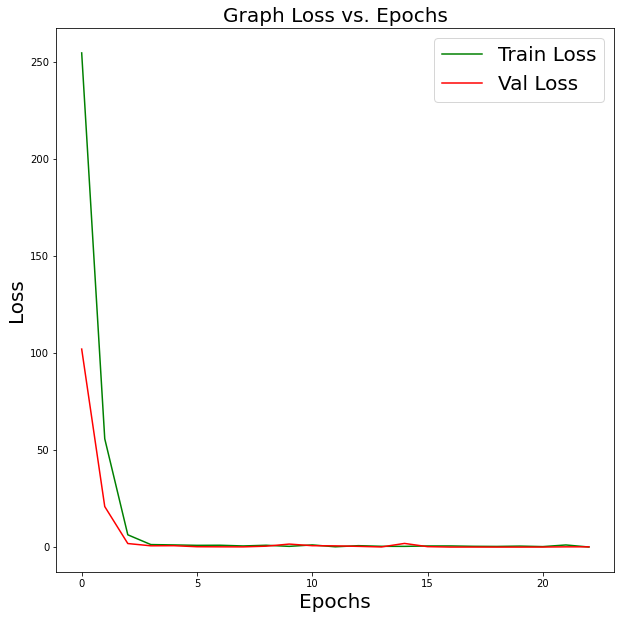

In [111]:
#Grafico el decaimiento del loss respecto al aumento de epochs
plt.figure(figsize=(10,10))
epocas = range(0,23)
plt.plot(epocas,loss , 'r-', c="g", label='Train Loss')
plt.plot(epocas,val_loss , 'r-', c="r", label='Val Loss')
plt.title('Graph Loss vs. Epochs', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss',size=20)
plt.legend( prop={'size': 20})
plt.show()
